Dataset has been augmentated.

- Random rotation
- Random translation
- Random deformation

This modifications of the image has been used in a way that the meaning of the signal can't change with the deformation (i.e. we won't flip 180º a turn left/right signal )

Only Y channel has been taken in account to train the NN. And an histogram adaptative equalization has been performed to help with shapes. 


In [1]:
# Load pickled data
import pickle
import numpy as np
import matplotlib as mpl
import cv2 
from   skimage  import exposure 
#TODO: Fill this in based on where you saved the training and testing data
from IPython.display import clear_output

training_file = 'train.p'
validation_file='valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

def obtain_Y(img_in):
    out = img_in[:,:,:,0] * 0.299 + img_in[:,:,:,1] * 0.587 + img_in[:,:,:,2] * 0.114
    out = (out / 255.).astype(np.float32)
    
    for nim in range(img_in.shape[0]):
        clear_output()
        print((nim*100)/img_in.shape[0])
        out[nim,] =  exposure.equalize_hist(out[nim,])
        out[nim]  =  exposure.equalize_adapthist(out[nim])
        
    #out = (out - 128.0)/255.0
    #out = np.expand_dims(out, axis=3) 
    return out



In [ ]:
def ampliate_feed_data(img_in,y_in):
    
    #img_out = img_in
    #y_out   = y_in
    
    img_aux_1 = np.zeros(np.shape(img_in))
    img_aux_2 = np.zeros(np.shape(img_in))
    img_aux_3 = np.zeros(np.shape(img_in))
    y_aux_1   = np.zeros(img_in.shape[0])
    y_aux_2   = np.zeros(img_in.shape[0])
    y_aux_3   = np.zeros(img_in.shape[0])
    
    for nim in range(img_in.shape[0]):
        print((nim*100)/img_in.shape[0])
        ( img_aux_1[nim,:,:] , y_aux_1[nim] ) = random_translation(img_in[nim, ], y_in[nim])
        ( img_aux_2[nim,:,:] , y_aux_2[nim] ) = random_rotation   (img_in[nim, ], y_in[nim])
        ( img_aux_3[nim,:,:] , y_aux_3[nim] ) = image_blurring    (img_in[nim, ], y_in[nim])
   # ( img_aux[3,:,:] , y_aux[3] ) = random_deformation(img_in[nim, ], y_in[nim])
        clear_output() 
   
    img_out = np.append(img_in,img_aux_1,axis=0)
    y_out   = np.append(y_in,y_aux_1,axis=0)
        
    img_out = np.append(img_out,img_aux_2,axis=0)
    y_out   = np.append(y_out,y_aux_2,axis=0)
      
    img_out = np.append(img_out,img_aux_3,axis=0)
    y_out   = np.append(y_out,y_aux_3,axis=0)
        
    return img_out, y_out

def random_translation(img_in,y_in):

    y_out = y_in
    aux = np.random.randint(-2,high = 3, size=2)
    translate = np.float32([[1,0,aux[0]],[0,1,aux[1]]])
    rows,cols = img_in.shape
    img_out = cv2.warpAffine(img_in,translate,(cols,rows))  
    
    return img_out, y_out

def random_rotation(img_in, y_in):
    y_out = y_in
    rows,cols = img_in.shape
    rotation_angle = np.random.randint(-15,high = 16, size = 1) 
    
    rotate = cv2.getRotationMatrix2D((cols/2,rows/2),rotation_angle,1)
    
    img_out = cv2.warpAffine(img_in,rotate,(cols,rows))
    
    return img_out, y_out
    
def image_blurring(img_in, y_in):
    
    y_out = y_in
    img_out = cv2.blur(img_in,(5,5))
    
    return img_out,y_out

In [ ]:

X_train = obtain_Y(X_train)
X_valid = obtain_Y(X_valid)
X_test  = obtain_Y(X_test)


6.0


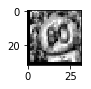

In [2]:
[pr,ypr] = ampliate_feed_data(X_train,y_train)

In [ ]:
X_train,y_train =  pr,ypr
X_train =  np.expand_dims(X_train, axis=3)
X_valid =  np.expand_dims(X_valid, axis=3)
X_test  =  np.expand_dims(X_test, axis=3) 

In [ ]:
np.save('X_train_after_processing.dat',X_train)
np.save('Y_train_after_processing.dat',y_train)
np.save('X_valid_after_processing.dat',X_valid)
np.save('X_test_after_processing.dat', X_test)

In [ ]:
import numpy as np

X_train = np.load('X_train_after_processing.dat.npy')
y_train =  np.load('Y_train_after_processing.dat.npy')
X_valid = np.load('X_valid_after_processing.dat.npy')
X_test = np.load('X_test_after_processing.dat.npy')

In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train[0,])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.size(np.unique(y_train))

print("Number of training examples =", n_train)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 139196
Image data shape = (32, 32, 1)
Number of classes = 43


[]

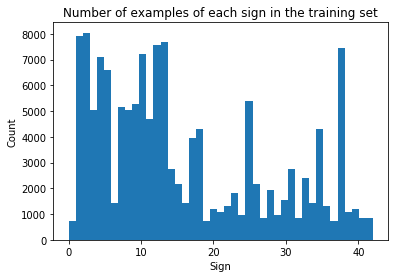

In [6]:
# Plot a histogram of the count of the number of examples of each sign
# in the test set
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(y_train, bins=n_classes)
plt.title('Number of examples of each sign in the training set')
plt.xlabel('Sign')
plt.ylabel('Count')
plt.plot()